# Prescriptive Analytics

### Import necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import seaborn as sns

In [9]:
df= pd.read_csv("Historical Product Demand.csv")
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


### Data Exploration & Cleaning

In [11]:
df.shape

(1048575, 5)

In [13]:
df.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


### Data Cleaning

In [17]:
df.isnull().sum

<bound method DataFrame.sum of          Product_Code  Warehouse  Product_Category   Date  Order_Demand
0               False      False             False  False         False
1               False      False             False  False         False
2               False      False             False  False         False
3               False      False             False  False         False
4               False      False             False  False         False
...               ...        ...               ...    ...           ...
1048570         False      False             False  False         False
1048571         False      False             False  False         False
1048572         False      False             False  False         False
1048573         False      False             False  False         False
1048574         False      False             False  False         False

[1048575 rows x 5 columns]>

In [19]:
# Dropping rows with missing values in the "Order Demand" column
df["Order_Demand"] = pd.to_numeric(df["Order_Demand"], errors="coerce")

In [21]:
#sorting data
df. Date.sort_values().unique()[:10]
data= df.set_index('Date')
data.index=pd.to_datetime(df.index)
data

,Product_Code,Warehouse,Product_Category,Order_Demand
1970-01-01 00:00:00.000000000,Product_0993,Whse_J,Category_028,100.0
1970-01-01 00:00:00.000000001,Product_0979,Whse_J,Category_028,500.0
1970-01-01 00:00:00.000000002,Product_0979,Whse_J,Category_028,500.0
1970-01-01 00:00:00.000000003,Product_0979,Whse_J,Category_028,500.0
1970-01-01 00:00:00.000000004,Product_0979,Whse_J,Category_028,500.0
...,...,...,...,...
1970-01-01 00:00:00.001048570,Product_1791,Whse_J,Category_006,1000.0
1970-01-01 00:00:00.001048571,Product_1974,Whse_J,Category_006,1.0
1970-01-01 00:00:00.001048572,Product_1787,Whse_J,Category_006,2500.0
1970-01-01 00:00:00.001048573,Product_0901,Whse_J,Category_023,50.0


### Data Visualisation

<Axes: xlabel='Warehouse', ylabel='count'>

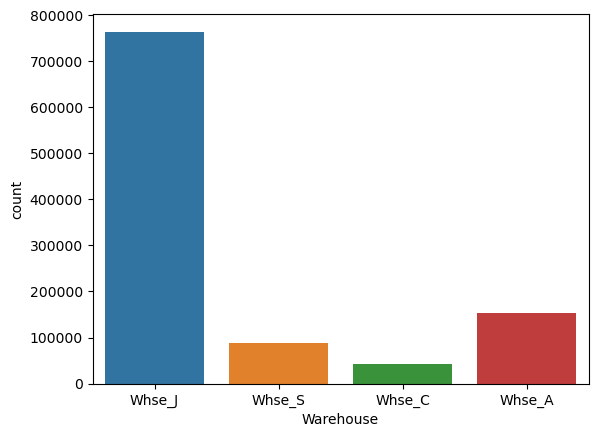

In [23]:
sns.countplot(x='Warehouse', data=df)

In [27]:
# showing total demand by each warehouse
warehouse_Demand= data.groupby('Warehouse')['Order_Demand'].sum()
warehouse_Demand

Warehouse
Whse_A    1.511523e+08
Whse_C    5.834583e+08
Whse_J    3.353861e+09
Whse_S    1.036126e+09
Name: Order_Demand, dtype: float64

### Define parameters

In [29]:
# Average demand
demand = df["Order_Demand"].mean() 
demand

4936.48800893165

In [31]:
#total demand
initial_inventory= df["Order_Demand"].sum()
initial_inventory

5124597821.0

In [33]:
# maximum inventory level for constraint
max_inventory= initial_inventory * 2
max_inventory

10249195642.0

In [35]:
# Example holding cost per unit day
holding_cost= 2
# Example ordering cost per order
ordering_cost = 50
# no. of days to hold inventory
holding_days= 30

### Define objective function & constrain for optimization

In [37]:
c = [holding_cost * holding_days + ordering_cost]
c

[110]

In [39]:
A= [[-1], [1]]
B= [-demand, max_inventory - initial_inventory]
bounds= [(0, None)]

### Solving optimisation problem

In [41]:
# By linear programming
x = linprog(c, A_ub=A, b_ub=B, bounds= bounds)
x

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 543013.6809824816
              x: [ 4.936e+03]
            nit: 0
          lower:  residual: [ 4.936e+03]
                 marginals: [ 0.000e+00]
          upper:  residual: [       inf]
                 marginals: [ 0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  5.125e+09]
                 marginals: [-1.100e+02 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [43]:
# finding optimal order quantity
optimal_order_quantity = x.x[0]
total_cost = x.fun
optimal_order_quantity

4936.48800893165

### Perform sensitivity analysis

In [45]:
# 20% increase in demand
demand_change= 1.2
# 20% decrease in cost
holding_cost_change= 0.8
# 50% increase in lead time
lead_time_change= 1.5

In [128]:
new_demand= demand* demand_change
new_holding_cost= holding_cost*holding_cost_change
new_lead_time= holding_days*holding_cost_change

In [49]:
new_demand

5923.7856107179805

In [51]:
new_holding_cost

1.6

In [53]:
new_lead_time

24.0

### Function for sensitivity analysis

In [136]:
def sensitivity_analysis(demand_change, holding_cost_change, lead_time_change):
    new_demand = demand * demand_change
    new_holding_cost = holding_cost * holding_cost_change
    new_lead_time = holding_days * holding_cost_change    
    new_c = [new_holding_cost + ordering_cost]
    new_b = [-new_demand, max_inventory - initial_inventory]
    new_x = linprog(new_c, A_ub=A, b_ub=new_b, bounds=bounds)
    new_optimal_order_quantity = new_x.x[0]
    new_total_cost = new_x.fun
    return new_optimal_order_quantity, new_total_cost

In [116]:
new_optimal_order_quantity

5923.7856107179805

In [118]:
new_total_cost

305667.3375130478

In [138]:
optimal_order_quantity_sensitivity, total_cost_sensitivity = sensitivity_analysis(
    demand_change, holding_cost_change, lead_time_change)

In [140]:
# printing results
print ("Sensitivity Analysis:")
print ("Optimal Order Quantity (Sensitivity):", optimal_order_quantity_sensitivity)
print ("Total Cost Sensitivity:",total_cost_sensitivity)

Sensitivity Analysis:
Optimal Order Quantity (Sensitivity): 5923.7856107179805
Total Cost Sensitivity: 305667.3375130478


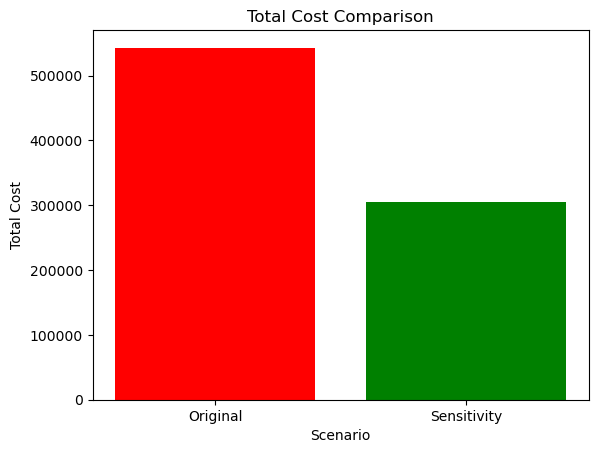

In [142]:
labels = ["Original", "Sensitivity"]
total_costs = [total_cost, total_cost_sensitivity]
plt.bar(labels, total_costs, color=['red', 'green'])
plt.xlabel("Scenario")
plt.ylabel("Total Cost")
plt.title("Total Cost Comparison")
plt.show()

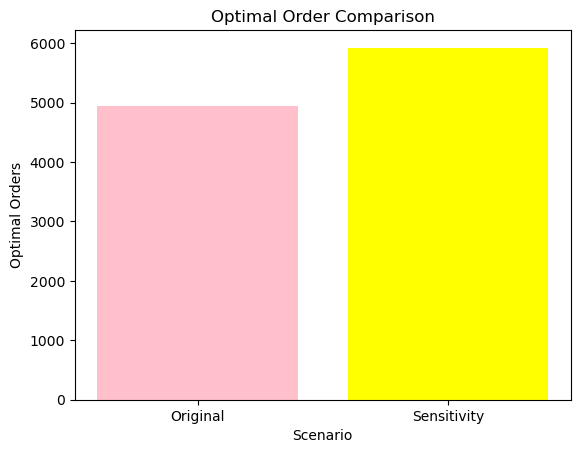

In [144]:
labels = ["Original", "Sensitivity"]
optimal_orders = [optimal_order_quantity, optimal_order_quantity_sensitivity]
plt.bar(labels, optimal_orders, color=['pink', 'yellow'])
plt.xlabel("Scenario")
plt.ylabel("Optimal Orders")
plt.title("Optimal Order Comparison")
plt.show()